In [1]:
import os
from pprint import pformat
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LC09_L1TP_200030_20220201_20220201_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

EOReader L9Product
Attributes:
	condensed_name: 20220201T104852_L9_200030_OLCI
	name: LC09_L1TP_200030_20220201_20220201_02_T1
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_20220201_20220201_02_T1.tar
	platform: Landsat-9
	sensor type: Optical
	product type: OLCI
	default resolution: 30.0
	acquisition datetime: 2022-02-01T10:48:52
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	tile name: 200030
	needs_extraction: False

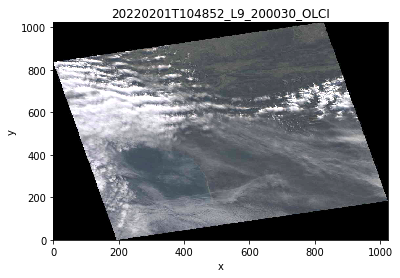

In [3]:
# Plot the quicklook
prod.plot()

In [4]:
# Some other information
print(
    f"Landsat tile: {prod.tile_name}\n\n"
    f"Acquisition datetime: {prod.datetime}\n\n"
    f"Existing bands:\n{pformat([band.value for band in prod.get_existing_bands()])}"
)

Landsat tile: 200030

Acquisition datetime: 2022-02-01 10:48:52

Existing bands:
['COASTAL_AEROSOL',
 'BLUE',
 'GREEN',
 'RED',
 'NIR',
 'NARROW_NIR',
 'CIRRUS',
 'SWIR_1',
 'SWIR_2',
 'THERMAL_IR_1',
 'THERMAL_IR_2',
 'PANCHROMATIC']


In [5]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32630)

<AxesSubplot:>

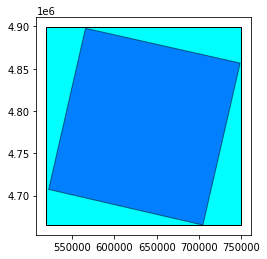

In [6]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [7]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Compute DEM band only if you have set a DEM in your environment path
if DEM_PATH in os.environ:
    bands.append(HILLSHADE)

# Be sure they exist for Landsat-5 TM sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Landsat-5 TM doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [8]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

<xarray.DataArray 'LC09_L1TP_200030_20220201_20220201_02_T1' (band: 1, y: 7791,
                                                              x: 7681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
    spatial_ref  int64 0
Attributes:
    cleaning_method:   nodata
    long_name:         GREEN
    sensor:            Landsat-9
    sensor_id:         L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    product_type:      OLCI
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLCI
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       49.31

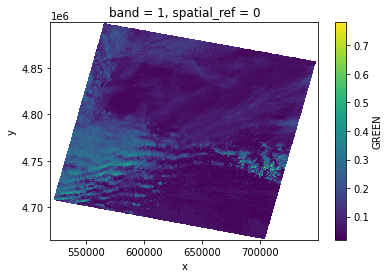

In [9]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

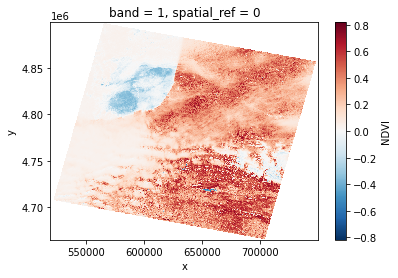

In [10]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

In [11]:
# Plot a subsampled version
if HILLSHADE in band_dict:
    band_dict[HILLSHADE][:, ::10, ::10].plot()

In [12]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'GREEN' (z: 3, y: 7791, x: 7681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
  * z            (z) MultiIndex
  - variable     (z) object 'GREEN' 'NDVI' 'CLOUDS'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS
    sensor:            Landsat-9
    sensor_id:         L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    product_type:      OLCI
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLCI
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       49.31

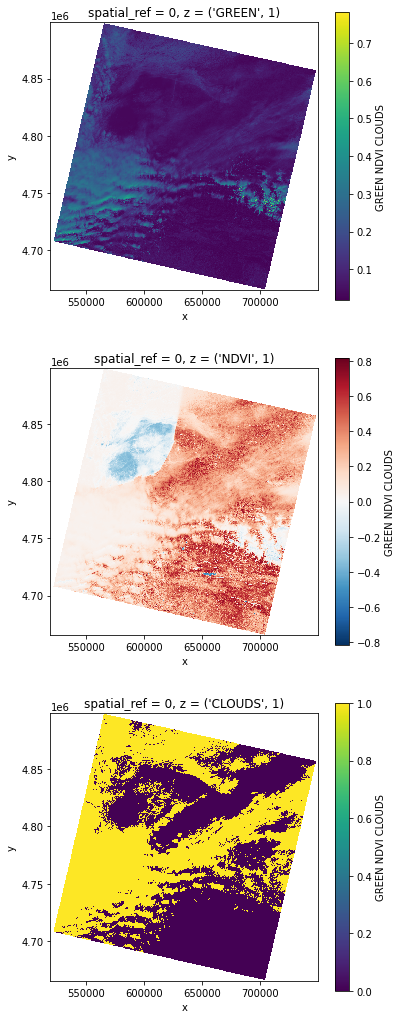

In [13]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])


In [14]:
# Reflectance band
from eoreader.keywords import TO_REFLECTANCE
prod.load(RED, **{TO_REFLECTANCE: True})

{<OpticalBandNames.RED: 'RED'>: <xarray.DataArray '20220201T104852_L9_200030_OLCI_RED_30-00m_nodata' (band: 1,
                                                                       y: 7791,
                                                                       x: 7681)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
   * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
     spatial_ref  int64 0
 Attributes:
     scale_factor:      1.0
     add_offset:        0.0
     long_name:         RED
     sensor:            Landsat-9
     sensor_id:         L9
     product_path:      /home/data/DATA/PR

In [15]:
# As is band
prod.load(RED, **{TO_REFLECTANCE: False})

{<OpticalBandNames.RED: 'RED'>: <xarray.DataArray 'LC09_L1TP_200030_20220201_20220201_02_T1' (band: 1, y: 7791,
                                                               x: 7681)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
   * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
     spatial_ref  int64 0
 Attributes:
     scale_factor:      1.0
     add_offset:        0.0
     cleaning_method:   nodata
     long_name:         RED
     sensor:            Landsat-9
     sensor_id:         L9
     product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
     product_nam